<a href="https://colab.research.google.com/github/LiibanMo/ML-Algorithms/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from typing import Self
import numpy as np

In [38]:
class LogisticRegression:
    def __init__(self, fit_intercept:bool=True, max_iter:int=100, tol:float=1e-4, lr:float=0.5, threshold:float=0.5, random_state:int=123):
        self._fit_intercept = fit_intercept
        self._max_iter = max_iter
        self._tol = tol
        self._lr = lr
        self._threshold = threshold
        self._random_state = 123

    def fit(self, X:np.ndarray, y:np.ndarray) -> Self:
        def logistic_func(x:np.ndarray, coef:np.ndarray):
            return 1 / (1 + np.exp(-x @ coef))

        if self._fit_intercept:
            X_train = np.column_stack((np.ones(X.shape[0]), X))
            self.coef = np.zeros(X_train.shape[1])
        else:
            X_train = X
            self.coef = np.zeros(X.shape[1])

        for iter in range(self._max_iter):
            d_log_likelihood = X_train.T @ (y - logistic_func(X_train, self.coef))
            new_coef = self.coef + self._lr * d_log_likelihood
            abs_diff = new_coef - self.coef
            if np.linalg.norm(abs_diff) < self._tol:
                break
            self.coef = new_coef

        return self

    def predict(self, X:np.ndarray) -> np.ndarray:
        def logistic_func(x:np.ndarray, coef:np.ndarray):
            return 1 / (1 + np.exp(-x.T @ coef))

        if self._fit_intercept:
            X_test = np.column_stack((np.ones(X.shape[0]), X))
        else:
            X_test = X

        y_pred = np.zeros(X_test.shape[0])

        for idx, x in enumerate(X_test):
            if logistic_func(x, self.coef) >= self._threshold:
                y_pred[idx] = 1
            else:
                y_pred[idx] = 0

        return y_pred

In [39]:
import numpy as np

np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = (X[:, 0] > 5).astype(int)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=123)

print(X_train.shape)

(80, 1)


[-189.8435973    38.08064367]


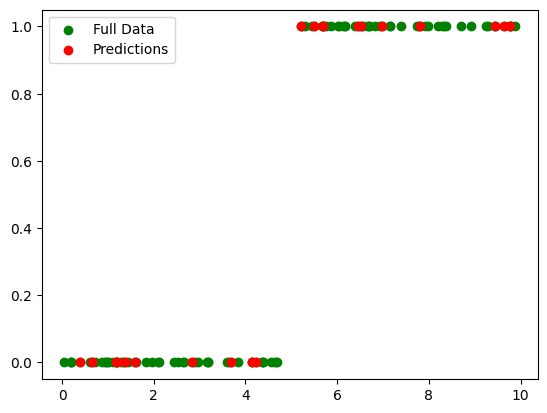

In [40]:
model = LogisticRegression()
fitted_model = model.fit(X_train, y_train)
print(fitted_model.coef)
y_pred = fitted_model.predict(X_test)

import matplotlib.pyplot as plt

plt.scatter(X, y, c="green", label="Full Data")
plt.scatter(X_test, y_pred, c="red", label="Predictions")
plt.legend()
plt.show()

[-12.31429357] [[2.4708732]]


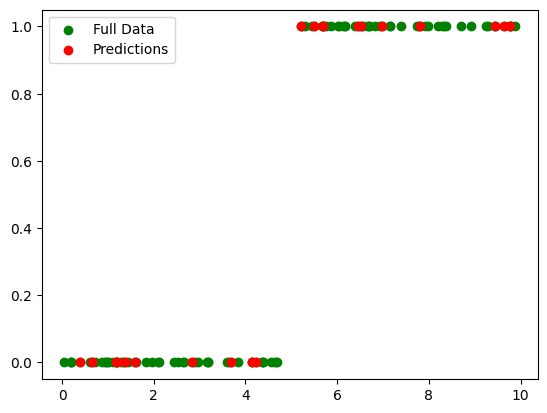

In [41]:
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression

sk_model = sk_LogisticRegression(fit_intercept=True)
sk_fitted_model = sk_model.fit(X_train, y_train)
print(sk_fitted_model.intercept_, sk_fitted_model.coef_)

import matplotlib.pyplot as plt

sk_y_pred = sk_fitted_model.predict(X_test)
plt.scatter(X, y, c="green", label="Full Data")
plt.scatter(X_test, sk_y_pred, c="red", label="Predictions")
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import f1_score

print(f"My model's F1-Score: {f1_score(y_pred, y_test)}")
print(f"Sklearn's model's F1-Score {f1_score(sk_y_pred, y_test)}")

My model's F1-Score: 1.0
Sklearn's model's F1-Score 1.0
